In [112]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

# load the dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [113]:
# Convert the month and day column to numerical values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7
}

df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)

# Drop the 'X' and 'Y' columns due to their high correlation with 'area'
df.drop(columns=['X', 'Y'], inplace=True)

# Perform log transformation on the 'area' column due to its skewed distribution
df['area'] = np.log1p(df['area'])

# Display the updated dataset
df.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [114]:
df.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,1.000000,-0.037469,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.114280
day,-0.037469,1.000000,0.073597,0.028697,0.001913,0.035926,0.032233,-0.083318,-0.004013,-0.024119,-0.005416
FFMC,0.291477,0.073597,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.046799
DMC,0.466645,0.028697,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.067153
DC,0.868698,0.001913,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.066360
ISI,0.186597,0.035926,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,-0.010347
temp,0.368842,0.032233,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.053487
RH,-0.095280,-0.083318,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.053662
wind,-0.086368,-0.004013,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.066973
rain,0.013438,-0.024119,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,0.023311


<Axes: >

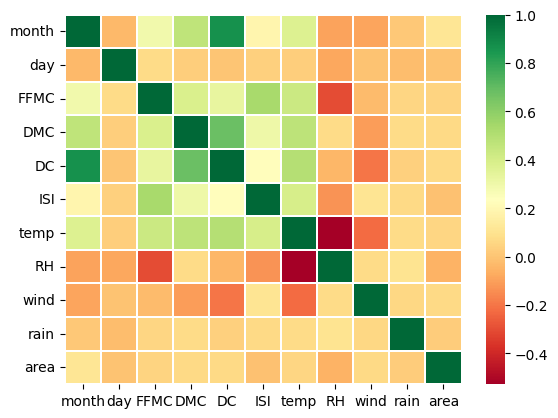

In [115]:
sns.heatmap(df.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = False)  

In [116]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
print(kmeans)

KMeans(n_clusters=3, random_state=0)


In [117]:
print(np.unique(kmeans.labels_, return_counts=True))

kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

(array([0, 1, 2], dtype=int32), array([ 89, 361,  67]))


In [118]:
# Visualize the clusters

# Enter PCA
pca = PCA(n_components=2).fit(df)

# Perform the transform
pca_trans = pca.transform(df)

pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
247,2,-47.089261,-9.479498
25,1,58.190832,22.208062
450,1,159.020546,80.002627
86,1,160.700123,-3.557027
500,1,133.894211,48.238831


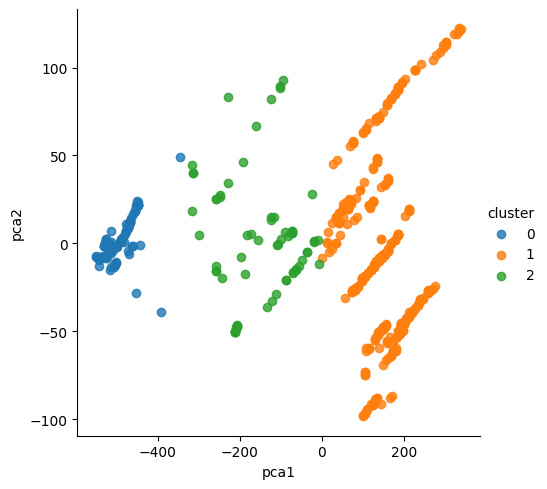

In [119]:
# Plot the results
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False)
plt.show()

Obj. Func: 6269838.209358396
Obj. Func: 3484961.0311215497
Obj. Func: 2465233.5753323594
Obj. Func: 1781757.9691776577
Obj. Func: 1430933.3579007299
Obj. Func: 1365684.7909323473
Obj. Func: 1140211.6603398891
Obj. Func: 882690.1893179112
Obj. Func: 773490.5550936488


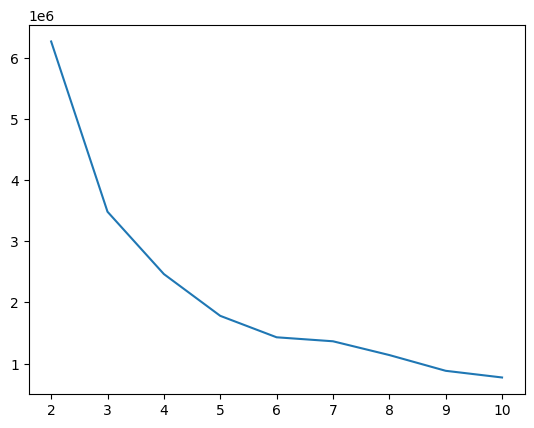

In [120]:
# Find the optimal number of clusters

clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(df)
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

# Optimal number of clusters is 3, 4, or 5

We're going to try 3, 4, and 5 clusters to see which one is the best.

KMeans(n_clusters=3, random_state=0)
(array([0, 1, 2], dtype=int32), array([ 89, 361,  67]))


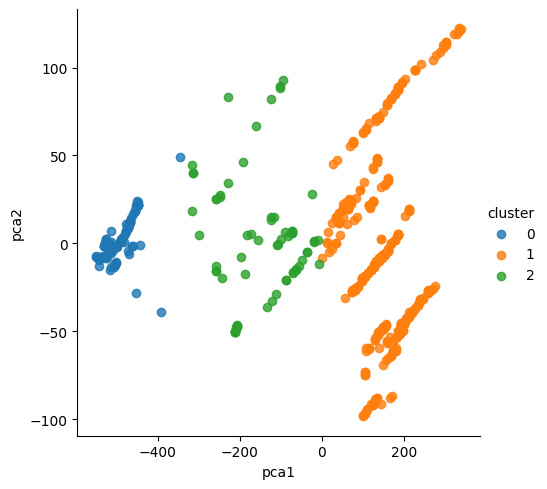

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 89, 150,  62, 216]))


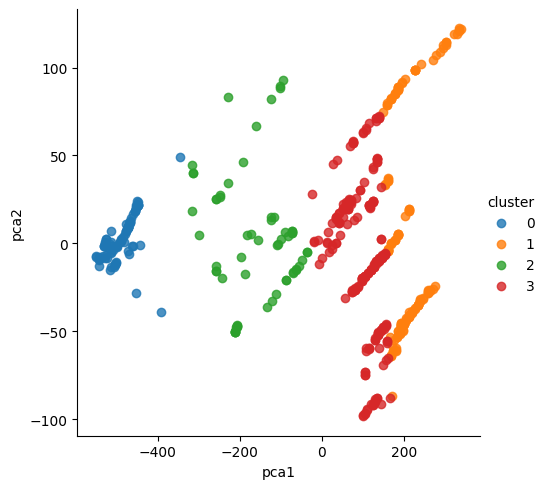

KMeans(n_clusters=5, random_state=0)
(array([0, 1, 2, 3, 4], dtype=int32), array([ 89, 190,  60, 134,  44]))


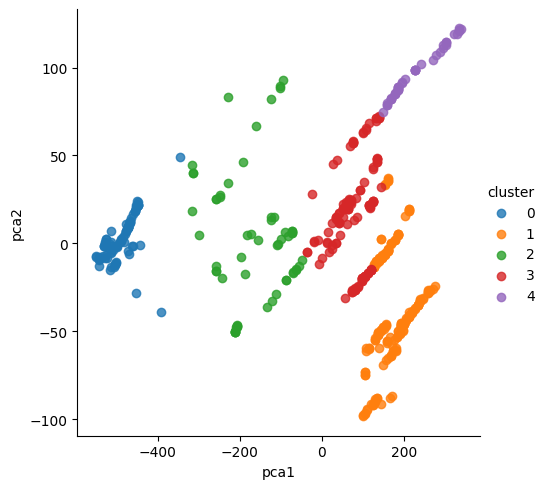

In [121]:
# Try different number of clusters

clusters = [3, 4, 5]

kmeans = [None] * len(clusters)
for i, j in enumerate(clusters):
    # for r in randomStates:
    kmeans[i] = KMeans(n_clusters=j, random_state=0).fit(df)
    print(kmeans[i])
    print(np.unique(kmeans[i].labels_, return_counts=True))
    kmeans[i] = pd.DataFrame(kmeans[i].labels_, columns=['cluster'])
    pca = PCA(n_components=2).fit(df)
    pca_trans = pca.transform(df)
    pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
    kmeans[i] = pd.concat([kmeans[i], pca_trans_df], axis=1)
    fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans[i], hue='cluster', fit_reg=False)
    plt.show()

# Try different random states with 4 clusters

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 89, 150,  62, 216]))


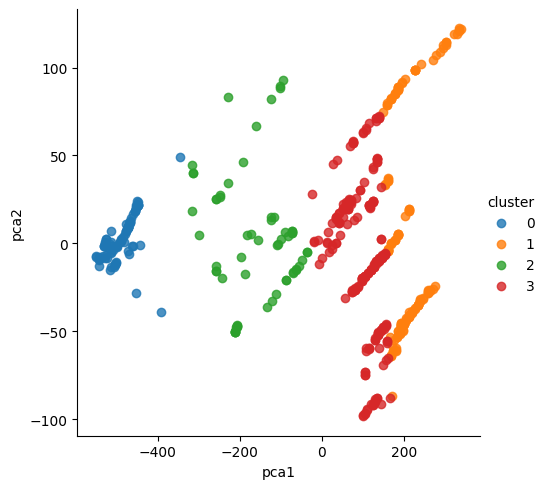

KMeans(n_clusters=4, random_state=10)
(array([0, 1, 2, 3], dtype=int32), array([148,  89, 218,  62]))


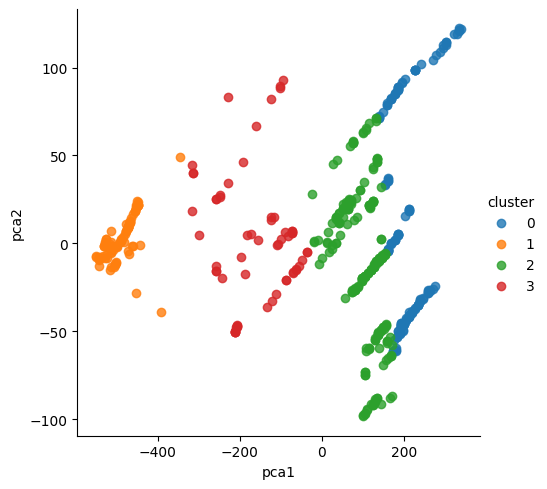

KMeans(n_clusters=4, random_state=100)
(array([0, 1, 2, 3], dtype=int32), array([ 67, 219,  89, 142]))


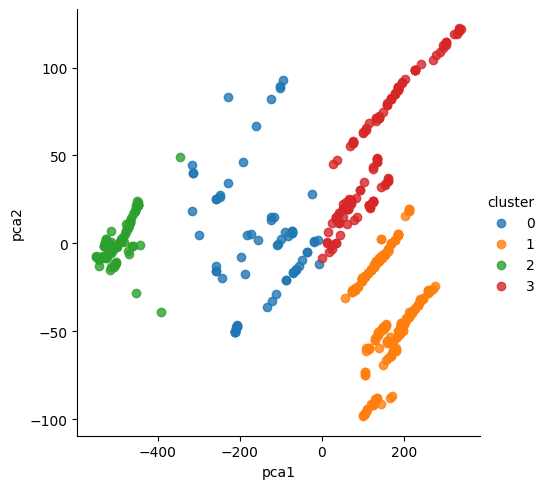

KMeans(n_clusters=4, random_state=1000)
(array([0, 1, 2, 3], dtype=int32), array([150,  89, 216,  62]))


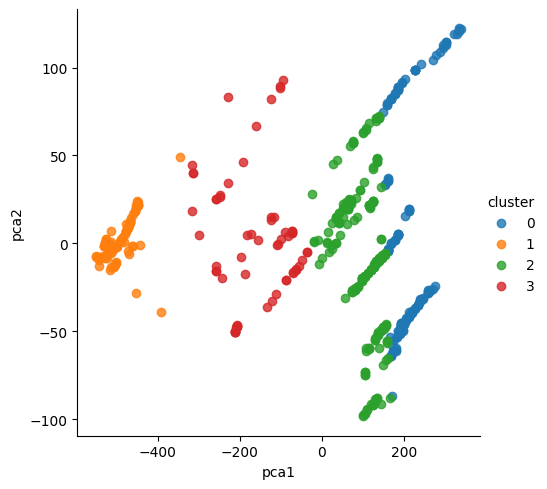

In [122]:
# Try different random states with 4 clusters
randomStates = [0, 10, 100, 1000]

for r in randomStates:
    kmeans[i] = KMeans(n_clusters=4, random_state=r).fit(df)
    print(kmeans[i])
    print(np.unique(kmeans[i].labels_, return_counts=True))
    kmeans[i] = pd.DataFrame(kmeans[i].labels_, columns=['cluster'])
    pca = PCA(n_components=2).fit(df)
    pca_trans = pca.transform(df)
    pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
    kmeans[i] = pd.concat([kmeans[i], pca_trans_df], axis=1)
    fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans[i], hue='cluster', fit_reg=False)
    plt.show()

# Try with different random states

Random state 0 gives the best silhouette score.

In [123]:
scalers = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

randomStates, kmeans = [0, 10, 100, 1000], {}

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 96, 282, 138,   1]))


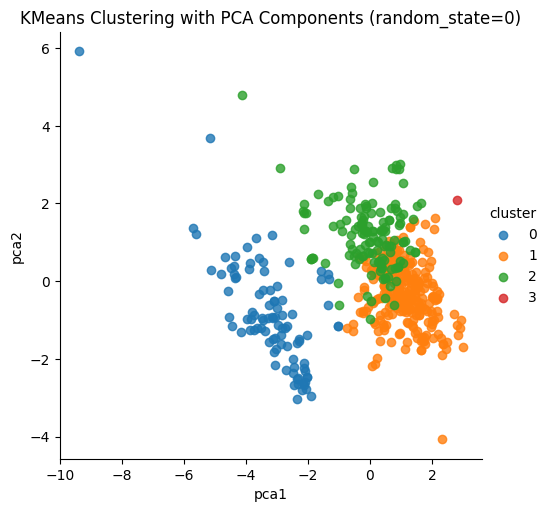

KMeans(n_clusters=4, random_state=10)
(array([0, 1, 2, 3], dtype=int32), array([201,  92, 137,  87]))


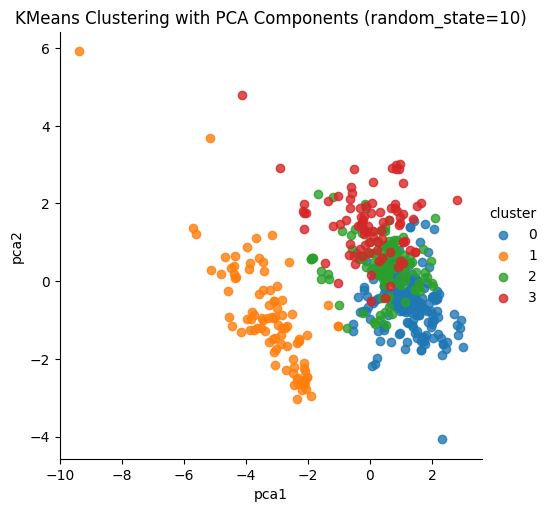

KMeans(n_clusters=4, random_state=100)
(array([0, 1, 2, 3], dtype=int32), array([ 17, 198,  91, 211]))


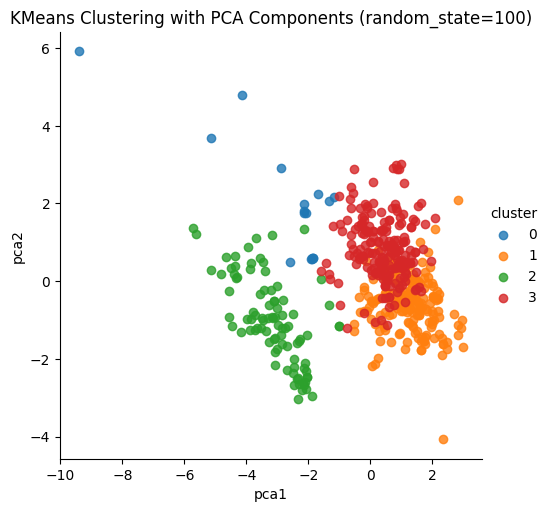

KMeans(n_clusters=4, random_state=1000)
(array([0, 1, 2, 3], dtype=int32), array([ 85, 241,  97,  94]))


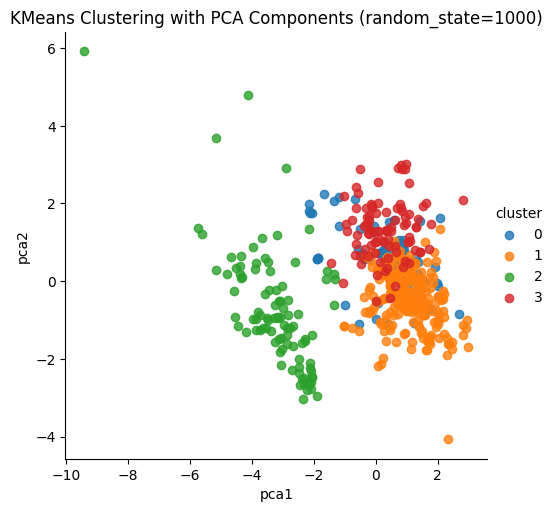

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 92, 223, 144,  58]))


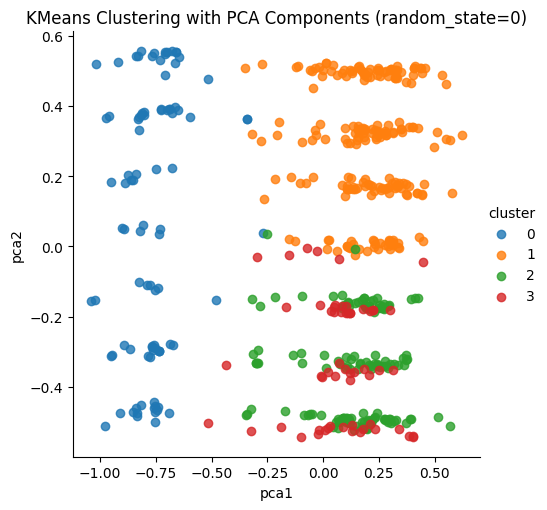

KMeans(n_clusters=4, random_state=10)
(array([0, 1, 2, 3], dtype=int32), array([189,  58, 175,  95]))


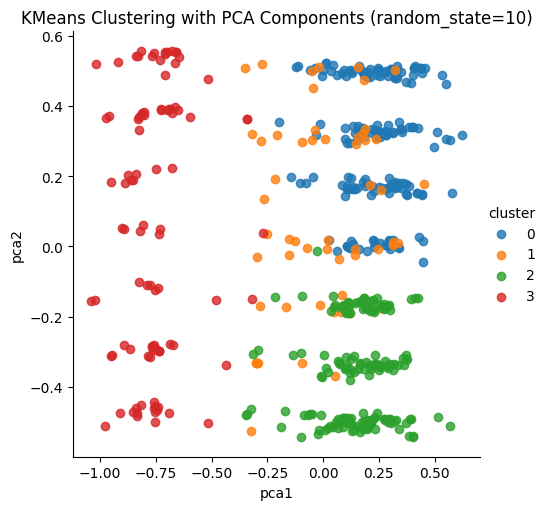

KMeans(n_clusters=4, random_state=100)
(array([0, 1, 2, 3], dtype=int32), array([ 16, 187,  95, 219]))


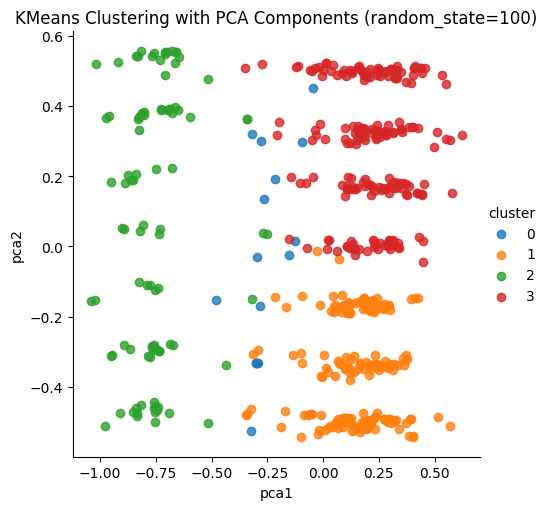

KMeans(n_clusters=4, random_state=1000)
(array([0, 1, 2, 3], dtype=int32), array([ 66, 209,  92, 150]))


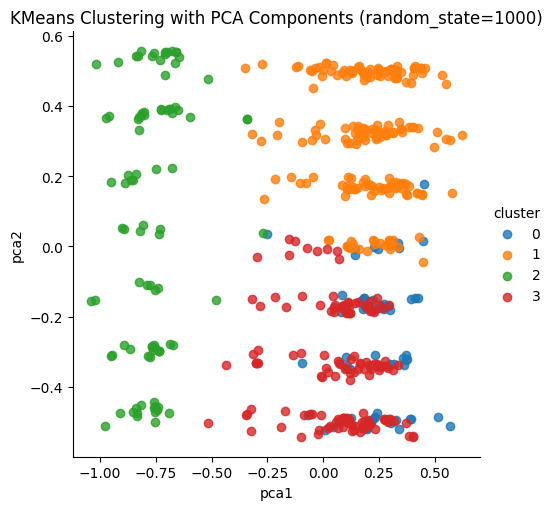

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 39, 251,  48, 179]))


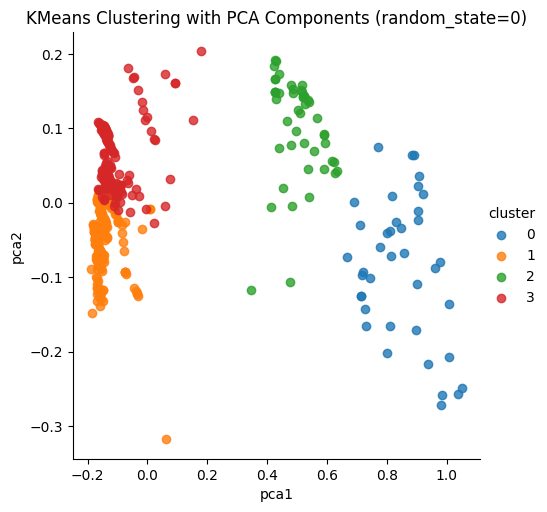

KMeans(n_clusters=4, random_state=10)
(array([0, 1, 2, 3], dtype=int32), array([179,  39,  48, 251]))


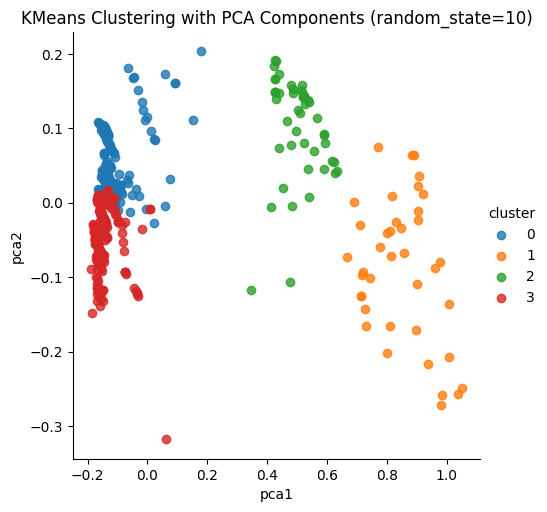

KMeans(n_clusters=4, random_state=100)
(array([0, 1, 2, 3], dtype=int32), array([ 28,  48, 402,  39]))


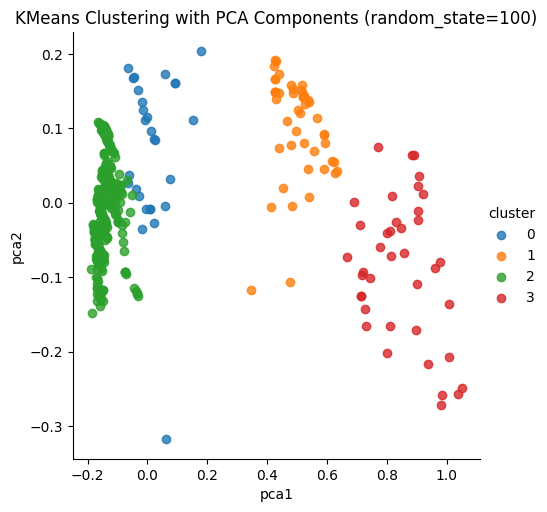

KMeans(n_clusters=4, random_state=1000)
(array([0, 1, 2, 3], dtype=int32), array([254,  48,  39, 176]))


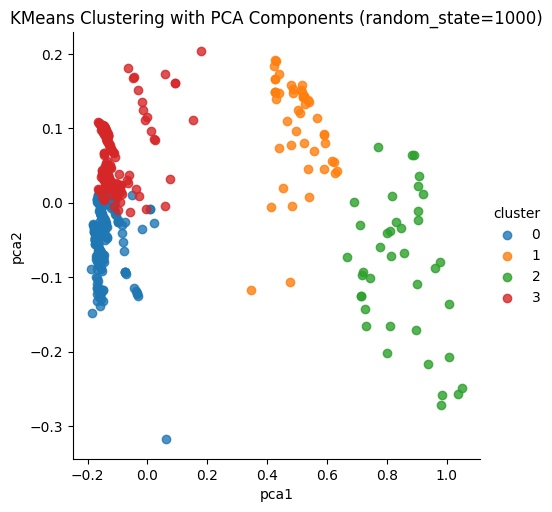

In [124]:
# Scale the features using MinMaxScaler
for scaler in scalers.values():
    for r in randomStates:
        scaled_data = scaler.fit_transform(df)

        kmeans = KMeans(n_clusters=4, random_state=r).fit(scaled_data)
        print(kmeans)
        print(np.unique(kmeans.labels_, return_counts=True))

        # Create a DataFrame for cluster labels
        cluster_df = pd.DataFrame(kmeans.labels_, columns=['cluster'])

        # Perform PCA
        pca = PCA(n_components=2).fit(scaled_data)
        pca_trans = pca.transform(scaled_data)
        pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

        # Concatenate cluster labels and PCA components
        result_df = pd.concat([cluster_df, pca_trans_df], axis=1)

        # Plot the results using sns.lmplot
        fig = sns.lmplot(x='pca1', y='pca2', data=result_df, hue='cluster', fit_reg=False)
        plt.title(f'KMeans Clustering with PCA Components (random_state={r})')
        plt.show()

KMeans(n_clusters=3, random_state=0)
(array([0, 1, 2], dtype=int32), array([ 96, 289, 132]))
KMeans(n_clusters=3, random_state=0)
(array([0, 1, 2], dtype=int32), array([ 96, 227, 194]))
KMeans(n_clusters=3, random_state=0)
(array([0, 1, 2], dtype=int32), array([ 39, 429,  49]))


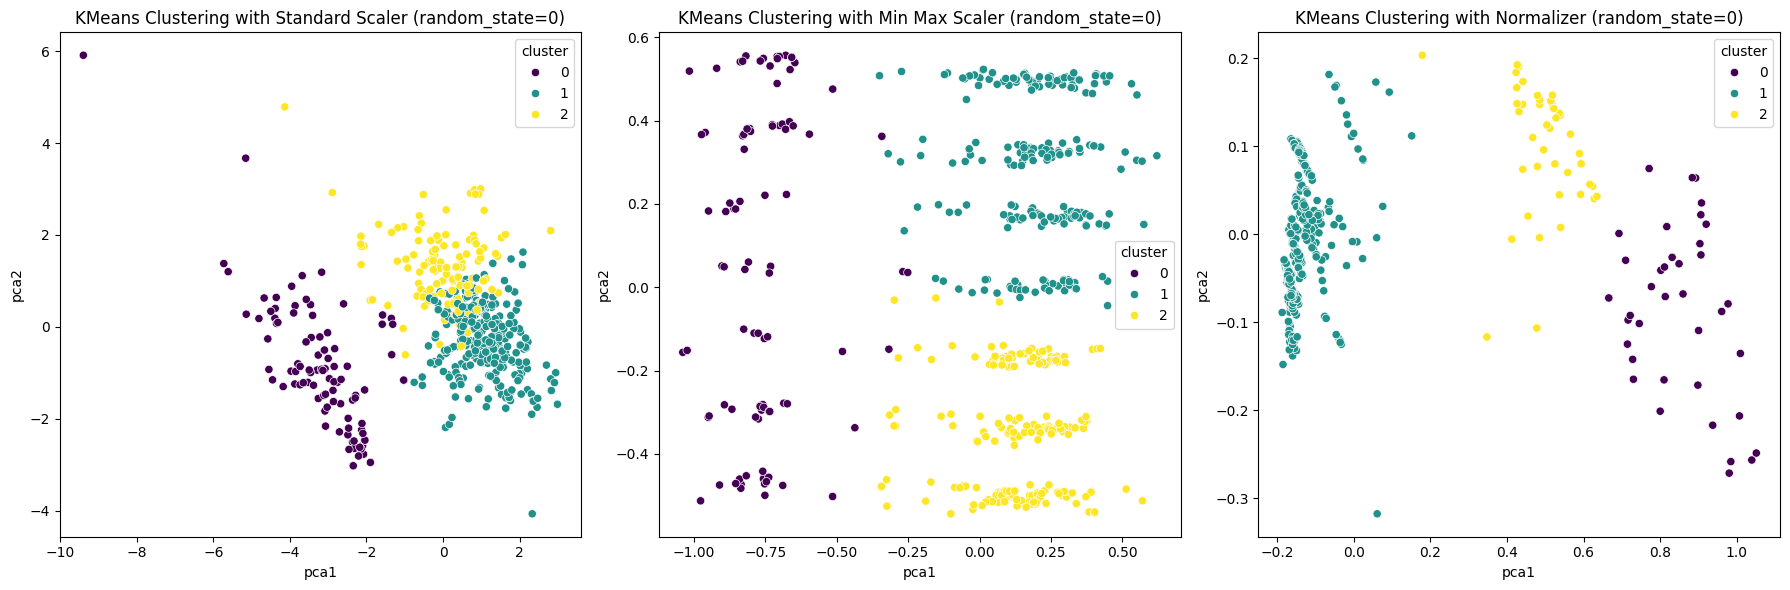

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (label, scaler) in zip(axes, scalers.items()):
    scaled_data = scaler.fit_transform(df)

    kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
    print(kmeans)
    print(np.unique(kmeans.labels_, return_counts=True))

    # Create a DataFrame for cluster labels
    cluster_df = pd.DataFrame(kmeans.labels_, columns=['cluster'])

    # Perform PCA
    pca = PCA(n_components=2).fit(scaled_data)
    pca_trans = pca.transform(scaled_data)
    pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

    # Concatenate cluster labels and PCA components
    result_df = pd.concat([cluster_df, pca_trans_df], axis=1)

    # Plot the results using sns.lmplot
    sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=result_df, ax=ax, palette='viridis')
    # sns.lmplot(x='pca1', y='pca2', data=result_df, hue='cluster', fit_reg=False)
    plt.title(f'KMeans Clustering with {label} (random_state={0})')
    ax.set_title(f'KMeans Clustering with {label} (random_state=0)')
    # plt.show)

# Adjust layout and display the figures
plt.tight_layout()
plt.show()


Analyzing StandardScaler
--------------------------------------------------

Feature Statistics:
DescribeResult(nobs=6204, minmax=(np.float64(-13.045817904306904), np.float64(21.572283715947112)), mean=np.float64(-8.246143935320312e-17), variance=np.float64(1.000161212316621), skewness=np.float64(1.4143995012577186), kurtosis=np.float64(41.899922501748385))


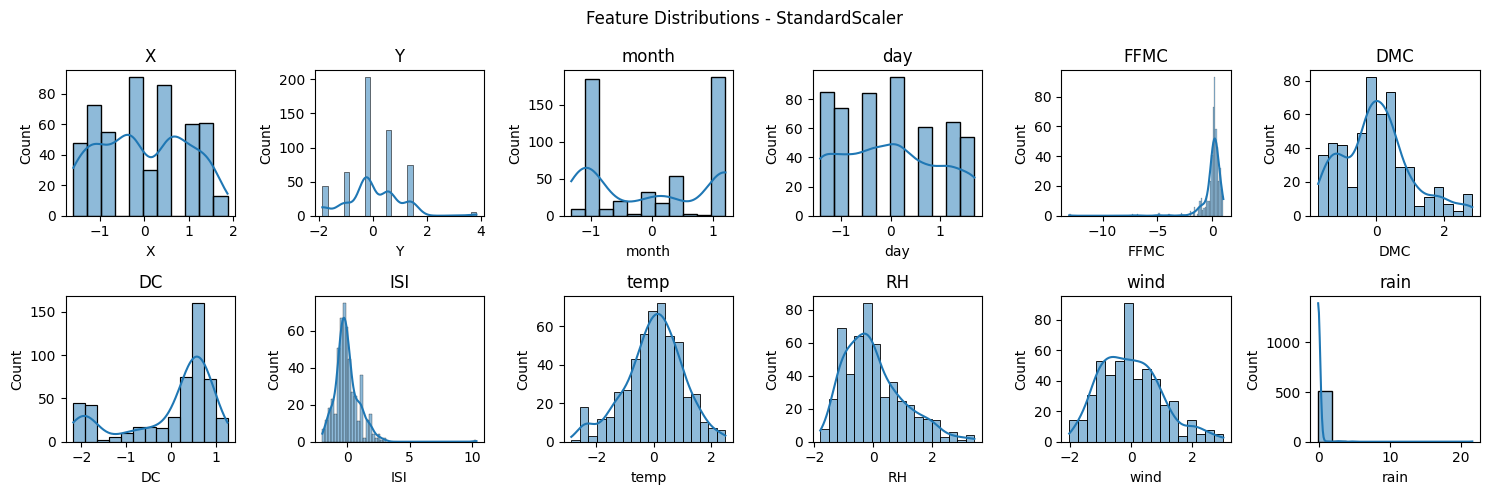


Applying KMeans with StandardScaler


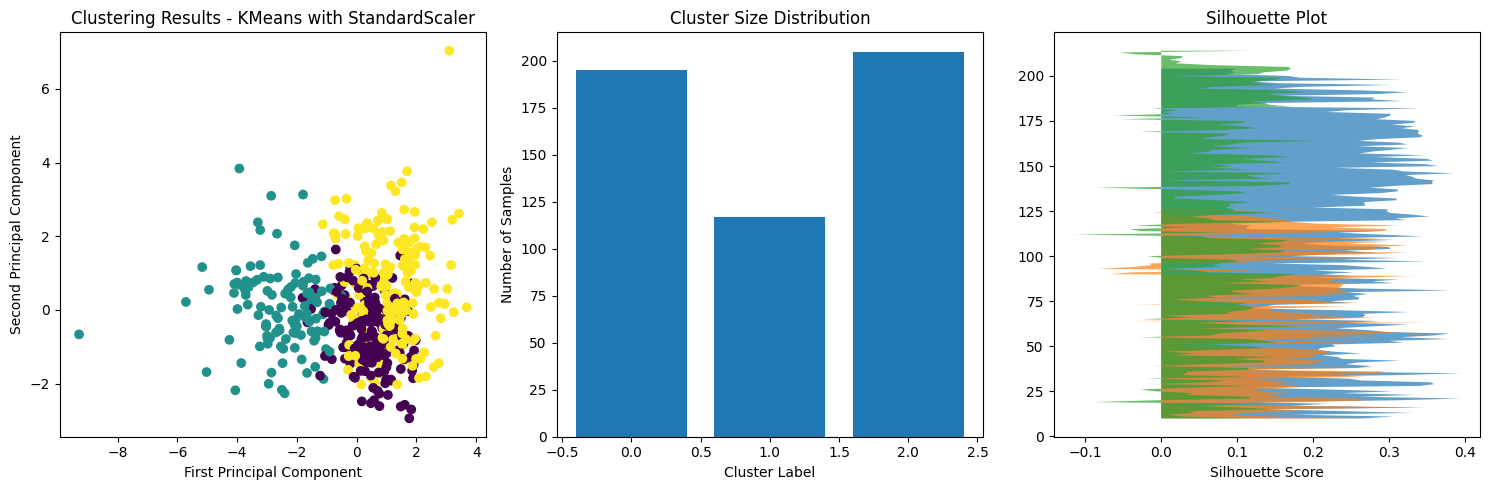

Silhouette Score: 0.171
Calinski-Harabasz Score: 93.386
Davies-Bouldin Score: 1.938

Applying Hierarchical with StandardScaler


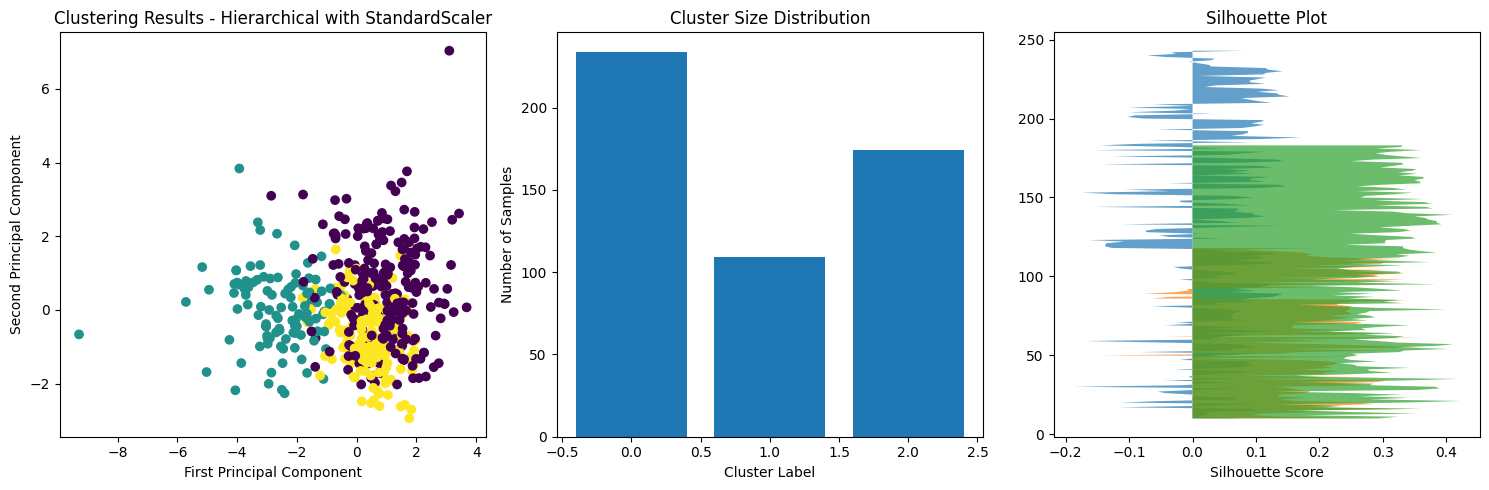

Silhouette Score: 0.158
Calinski-Harabasz Score: 88.363
Davies-Bouldin Score: 1.988

Applying GMM with StandardScaler


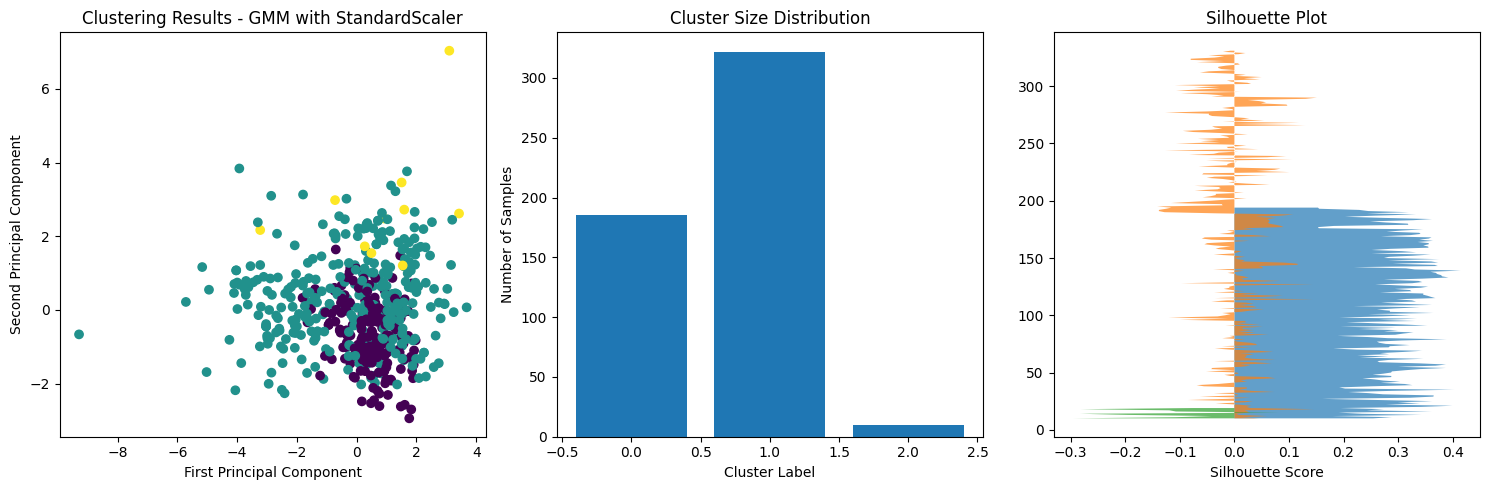

Silhouette Score: 0.104
Calinski-Harabasz Score: 39.879
Davies-Bouldin Score: 2.244

Analyzing MinMaxScaler
--------------------------------------------------

Feature Statistics:
DescribeResult(nobs=6204, minmax=(np.float64(0.0), np.float64(1.0000000000000002)), mean=np.float64(0.4295078888934989), variance=np.float64(0.10164870965721685), skewness=np.float64(0.33648336365540654), kurtosis=np.float64(-1.1314076095150032))


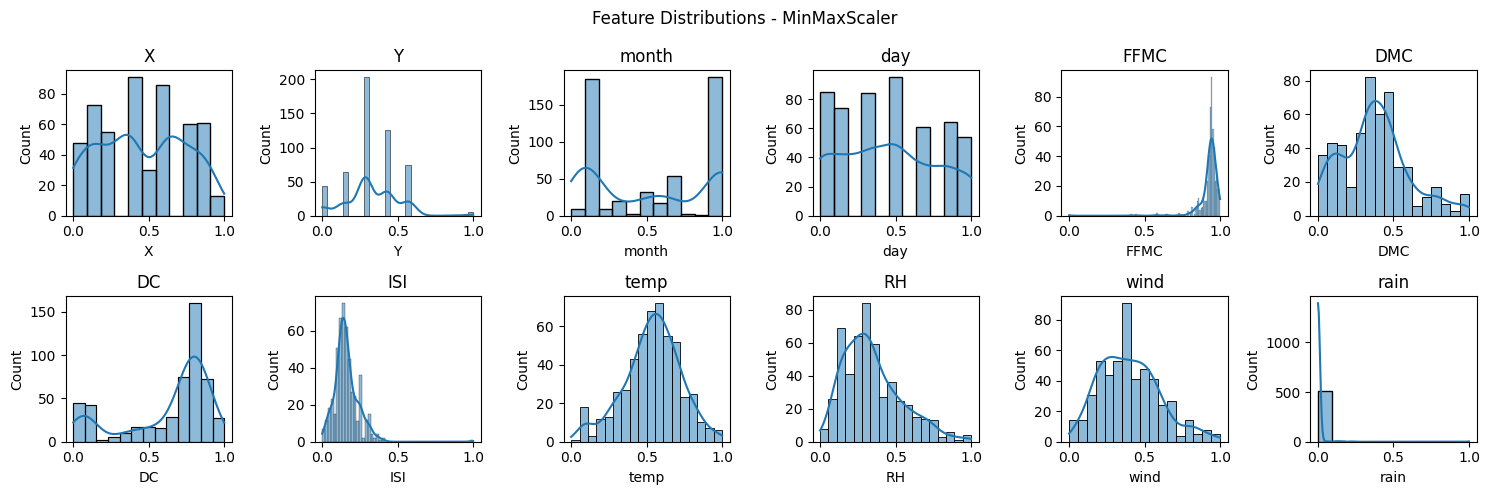


Applying KMeans with MinMaxScaler


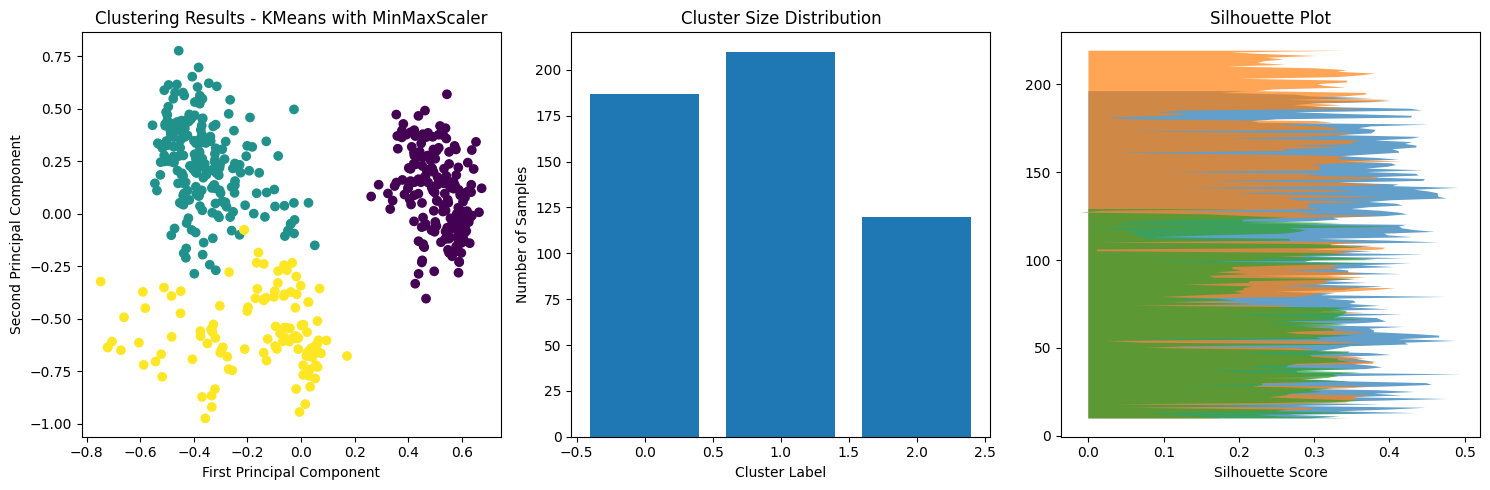

Silhouette Score: 0.301
Calinski-Harabasz Score: 179.388
Davies-Bouldin Score: 1.404

Applying Hierarchical with MinMaxScaler


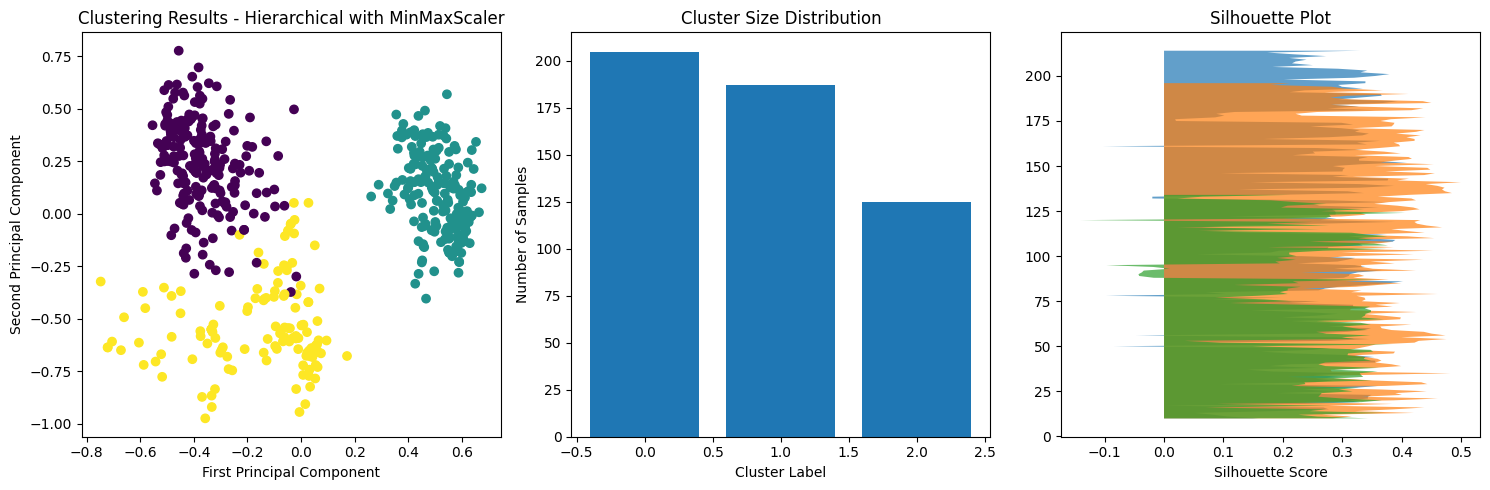

Silhouette Score: 0.294
Calinski-Harabasz Score: 174.436
Davies-Bouldin Score: 1.434

Applying GMM with MinMaxScaler


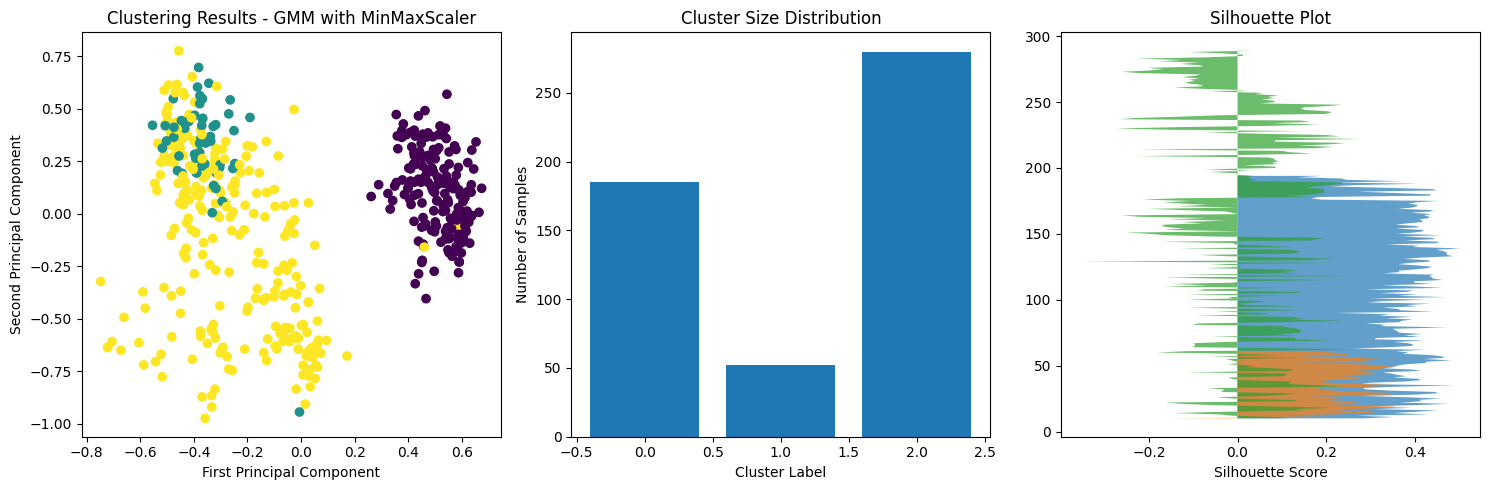

Silhouette Score: 0.170
Calinski-Harabasz Score: 104.888
Davies-Bouldin Score: 1.955

Analyzing Normalizer
--------------------------------------------------

Feature Statistics:
DescribeResult(nobs=6204, minmax=(np.float64(0.0), np.float64(0.9890686755043794)), mean=np.float64(0.1294964301416529), variance=np.float64(0.06657473885182072), skewness=np.float64(2.539369160677523), kurtosis=np.float64(5.174325986051368))


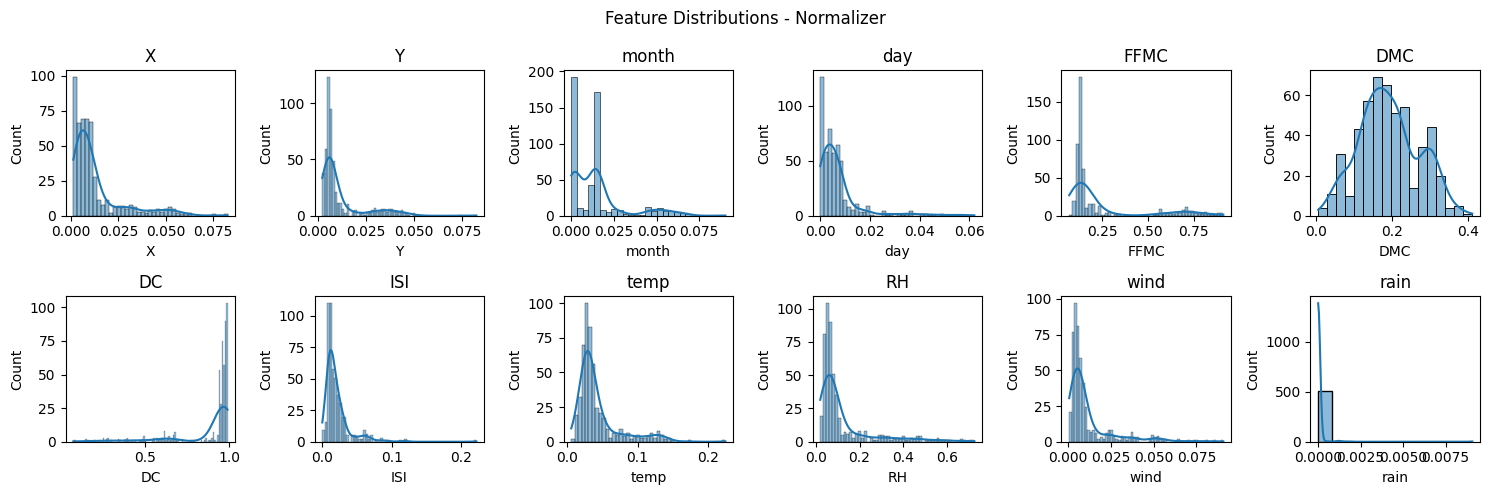


Applying KMeans with Normalizer


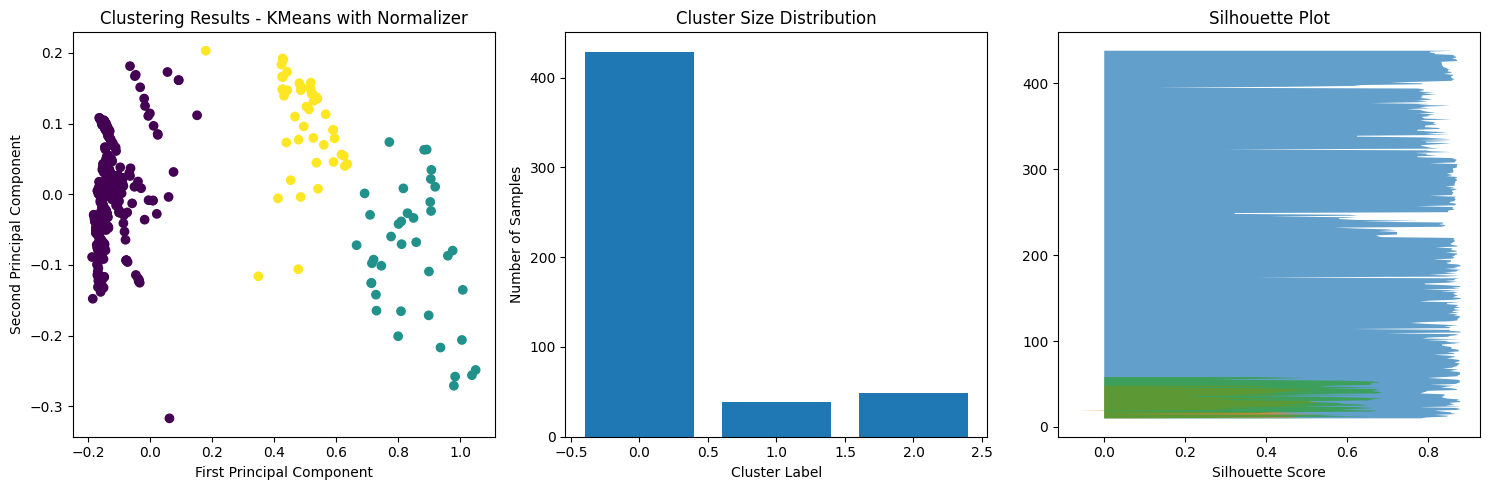

Silhouette Score: 0.766
Calinski-Harabasz Score: 1821.569
Davies-Bouldin Score: 0.658

Applying Hierarchical with Normalizer


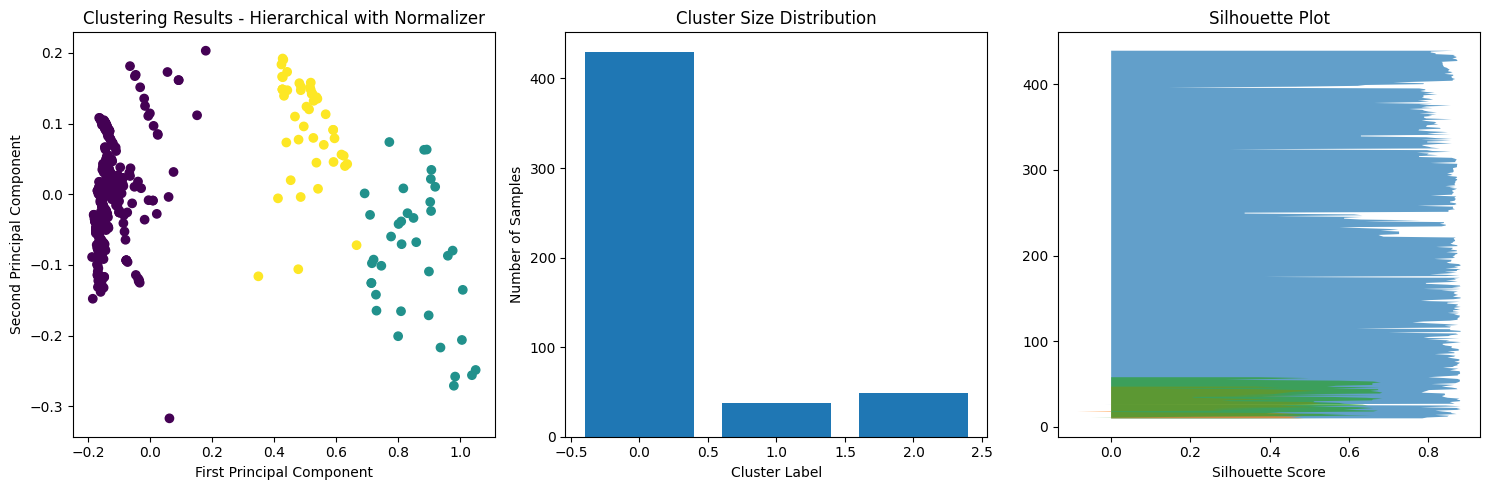

Silhouette Score: 0.766
Calinski-Harabasz Score: 1805.108
Davies-Bouldin Score: 0.662

Applying GMM with Normalizer


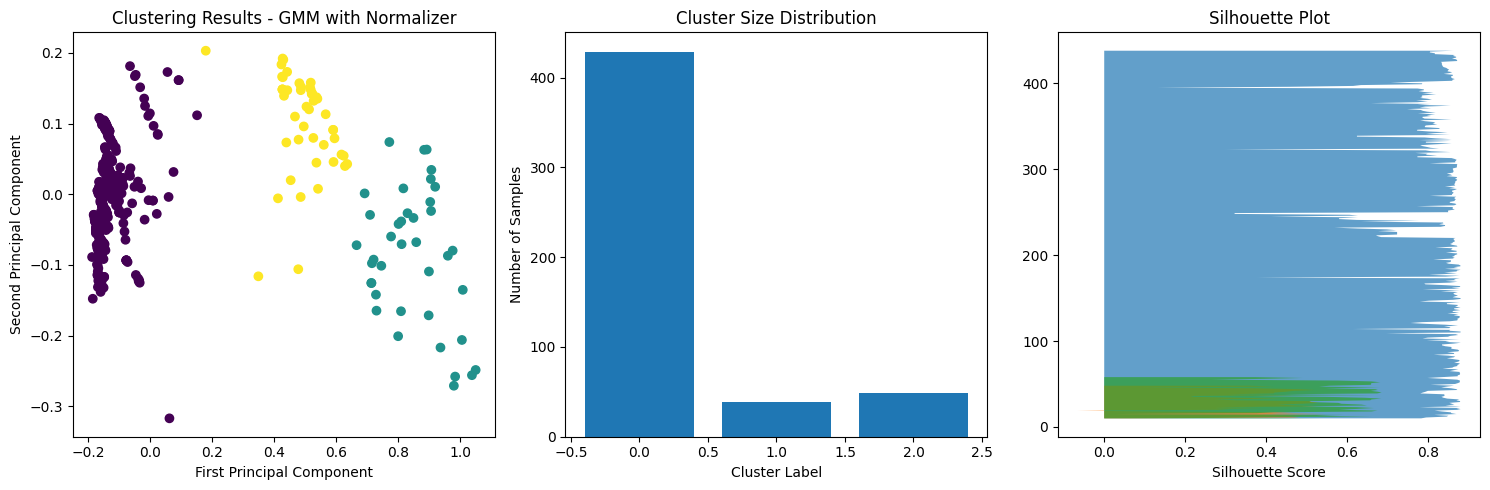

Silhouette Score: 0.766
Calinski-Harabasz Score: 1821.569
Davies-Bouldin Score: 0.658


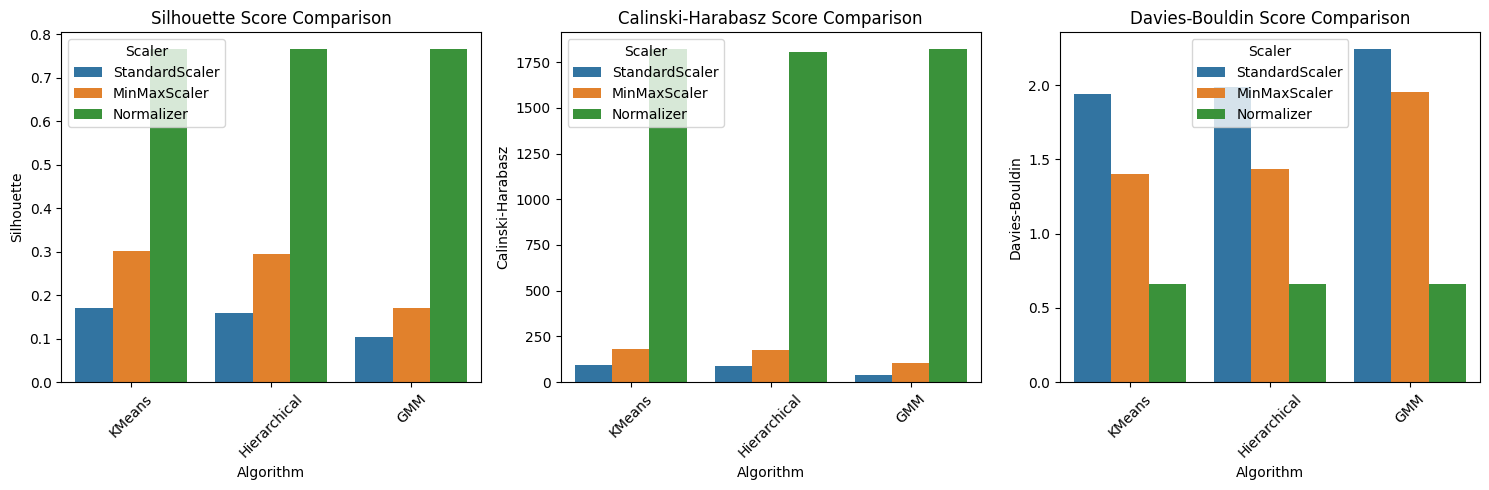


Summary of Results:
        Scaler    Algorithm  Silhouette  Calinski-Harabasz  Davies-Bouldin
StandardScaler       KMeans       0.171             93.386           1.938
StandardScaler Hierarchical       0.158             88.363           1.988
StandardScaler          GMM       0.104             39.879           2.244
  MinMaxScaler       KMeans       0.301            179.388           1.404
  MinMaxScaler Hierarchical       0.294            174.436           1.434
  MinMaxScaler          GMM       0.170            104.888           1.955
    Normalizer       KMeans       0.766           1821.569           0.658
    Normalizer Hierarchical       0.766           1805.108           0.662
    Normalizer          GMM       0.766           1821.569           0.658

Statistical Analysis of Scaling Impact:

Silhouette Score Analysis:
Scaler        MinMaxScaler  Normalizer  StandardScaler
Algorithm                                             
GMM                  0.170       0.766           0

In [127]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

# load the dataset
df = pd.read_csv(url)

# Convert categorical variables
df['month'] = pd.Categorical(df['month']).codes
df['day'] = pd.Categorical(df['day']).codes

# Prepare feature matrix
X = df.drop('area', axis=1)

# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

# Initialize clustering algorithms
def get_clustering_algorithms():
    return {
        'KMeans': KMeans(n_clusters=3, random_state=42),
        'Hierarchical': AgglomerativeClustering(n_clusters=3),
        'GMM': GaussianMixture(n_components=3, random_state=42),
        # 'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    }

# Function to compute clustering metrics
def compute_clustering_metrics(X, labels):
    try:
        sil_score = silhouette_score(X, labels)
        cal_score = calinski_harabasz_score(X, labels)
        dav_score = davies_bouldin_score(X, labels)
        return sil_score, cal_score, dav_score
    except:
        return None, None, None

# Function to analyze feature distributions
def analyze_distributions(X, title):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(X.columns, 1):
        plt.subplot(2, 6, i)
        sns.histplot(X[column], kde=True)
        plt.title(column)
    plt.suptitle(f'Feature Distributions - {title}')
    plt.tight_layout()
    plt.show()

# Function to visualize clustering results
def plot_clustering_results(X, labels, title):
    plt.figure(figsize=(15, 5))
    
    # PCA for 2D visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.subplot(131)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'Clustering Results - {title}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
    # Distribution of cluster assignments
    plt.subplot(132)
    unique_labels = np.unique(labels)
    counts = [sum(labels == label) for label in unique_labels]
    plt.bar(range(len(unique_labels)), counts)
    plt.title('Cluster Size Distribution')
    plt.xlabel('Cluster Label')
    plt.ylabel('Number of Samples')
    
    # Silhouette plot
    from sklearn.metrics import silhouette_samples
    plt.subplot(133)
    silhouette_vals = silhouette_samples(X, labels)
    for label in unique_labels:
        cluster_silhouette_vals = silhouette_vals[labels == label]
        y_lower = 10
        plt.fill_betweenx(np.arange(y_lower, y_lower + len(cluster_silhouette_vals)),
                         0, cluster_silhouette_vals,
                         alpha=0.7)
        y_lower += len(cluster_silhouette_vals) + 10
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()

# Initialize results storage
results = []

# Perform analysis for each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nAnalyzing {scaler_name}")
    print("-" * 50)
    
    # Scale the data
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Analyze and plot distributions
    print("\nFeature Statistics:")
    print(describe(X_scaled.flatten()))
    analyze_distributions(X_scaled_df, scaler_name)
    
    # Apply clustering algorithms
    clustering_algorithms = get_clustering_algorithms()
    
    for algo_name, algo in clustering_algorithms.items():
        print(f"\nApplying {algo_name} with {scaler_name}")
        
        # Fit and predict
        labels = algo.fit_predict(X_scaled)
        
        # Compute metrics
        sil_score, cal_score, dav_score = compute_clustering_metrics(X_scaled, labels)
        
        # Store results
        results.append({
            'Scaler': scaler_name,
            'Algorithm': algo_name,
            'Silhouette': sil_score,
            'Calinski-Harabasz': cal_score,
            'Davies-Bouldin': dav_score
        })
        
        # Plot clustering results
        plot_clustering_results(X_scaled, labels, f"{algo_name} with {scaler_name}")
        
        print(f"Silhouette Score: {sil_score:.3f}")
        print(f"Calinski-Harabasz Score: {cal_score:.3f}")
        print(f"Davies-Bouldin Score: {dav_score:.3f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Create comparison visualizations
plt.figure(figsize=(15, 5))

# Silhouette Score Comparison
plt.subplot(131)
sns.barplot(data=results_df, x='Algorithm', y='Silhouette', hue='Scaler')
plt.title('Silhouette Score Comparison')
plt.xticks(rotation=45)

# Calinski-Harabasz Score Comparison
plt.subplot(132)
sns.barplot(data=results_df, x='Algorithm', y='Calinski-Harabasz', hue='Scaler')
plt.title('Calinski-Harabasz Score Comparison')
plt.xticks(rotation=45)

# Davies-Bouldin Score Comparison
plt.subplot(133)
sns.barplot(data=results_df, x='Algorithm', y='Davies-Bouldin', hue='Scaler')
plt.title('Davies-Bouldin Score Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary of Results:")
print(results_df.round(3).to_string(index=False))

# Statistical analysis of the impact
print("\nStatistical Analysis of Scaling Impact:")
for metric in ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']:
    print(f"\n{metric} Score Analysis:")
    print(results_df.pivot_table(
        values=metric,
        index='Algorithm',
        columns='Scaler',
        aggfunc='mean'
    ).round(3))

# Feature variance analysis
print("\nFeature Variance Analysis:")
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    variances = np.var(X_scaled, axis=0)
    print(f"\n{scaler_name} Feature Variances:")
    for feature, variance in zip(X.columns, variances):
        print(f"{feature}: {variance:.3f}")